BDA Sesi 28 Non Linear Regresion

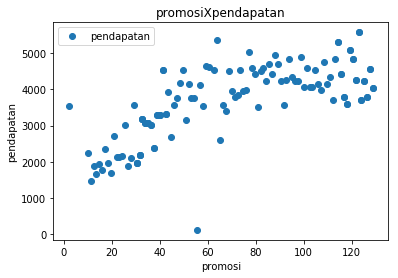

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/dzadh/dts_bda/master/data/advertising%20(4).csv")
# df.head(10)
df.plot(x='promosi',y='pendapatan',style='o')
plt.title("promosiXpendapatan")
plt.xlabel("promosi")
plt.ylabel("pendapatan")
plt.show()
x_dat=df['promosi']
y_dat=df['pendapatan']

In [17]:
from scipy.optimize import curve_fit

def kuardratik(x,a,b,c):
    return a*x**2 + b*x +c
def kubik(x, a, b, c,d):
    return a*x**3 + b*x**2 +c*x + d
def exponen(x, a, b, c):
    return c + a * np.exp(-b * x)
def linreg(x,a,b):
    return a*x + b
def sigmoid(x,a,b,c,d):
    return a / (b + np.exp(-c*(x-d)))

function coef [  19.78558949 2282.17355056]


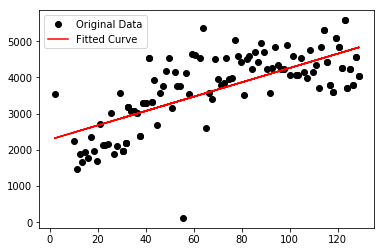

In [8]:
#linier
popt, pcov = curve_fit(linreg, x_dat, y_dat)
print("function coef",popt)
plt.figure()
plt.plot(x_dat, y_dat, 'ko', label="Original Data")
plt.plot(x_dat, linreg(x_dat, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()


function coef [-2.80044582e-01  5.99459725e+01  1.23176584e+03]


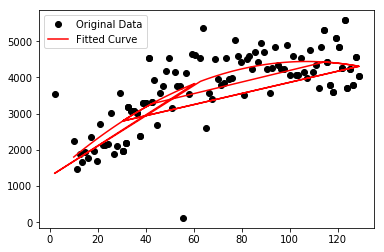

In [18]:
#kuardratik
popt, pcov = curve_fit(kuardratik, x_dat, y_dat)
# y = kuardratik(x_dat,0.2,6,12)
print("function coef",popt)
plt.figure()
plt.plot(x_dat, y_dat, 'ko', label="Original Data")
plt.plot(x_dat, kuardratik(x_dat,*popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()


function coef [-1.95355821e-03  1.27389689e-01  3.60435136e+01  1.59084266e+03]


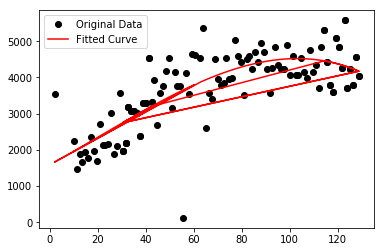

In [51]:
#kubik
popt, pcov = curve_fit(kubik, x_dat, y_dat)
print("function coef",popt)
plt.figure()
plt.plot(x_dat, y_dat, 'ko', label="Original Data")
plt.plot(x_dat, kubik(x_dat, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()


C:\Users\dzadh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


function coef [ 8.00769924e+06 -2.47031470e-06 -8.00541696e+06]


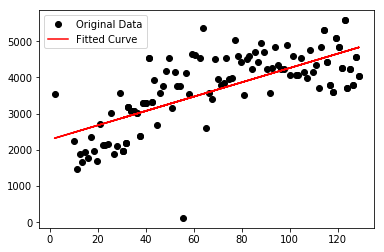

In [63]:
#exponen
popt, pcov = curve_fit(exponen, x_dat, y_dat,maxfev = 10000)
print("function coef",popt)
plt.figure()
plt.plot(x_dat, y_dat, 'ko', label="Original Data")
plt.plot(x_dat, exponen(x_dat, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

C:\Users\dzadh\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


function coef [ 1.57806135e+01  4.29110762e-03 -4.96354565e+04  7.68390680e+04]


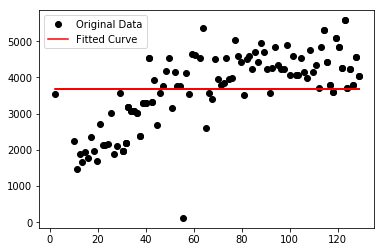

In [61]:
#sigmoid
popt, pcov = curve_fit(sigmoid, x_dat, y_dat,maxfev = 10000)
print("function coef",popt)
plt.figure()
plt.plot(x_dat, y_dat, 'ko', label="Original Data")
plt.plot(x_dat, sigmoid(x_dat, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

70.52283464566928 37.418865009079035
127 127


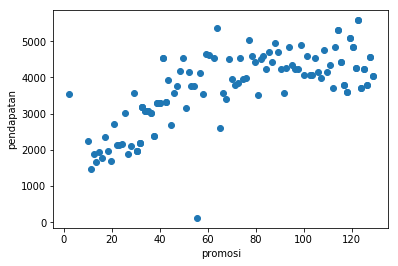

In [43]:
meanv = df['promosi'].mean()
stdv = df['promosi'].std()
meany = df['pendapatan'].mean()
stdy = df['pendapatan'].std()
print(meanv,stdv)
asd=70

dfclean=df[((np.abs((df['promosi']-meany)/stdy)<=asd)&np.abs((df['pendapatan']-meanv)/stdv)<=asd)]
print(len(dfclean),len(df))
plt.scatter(dfclean['promosi'],dfclean['pendapatan'])
plt.xlabel('promosi')
plt.ylabel('pendapatan')
plt.show()

tidak terdapat outlier

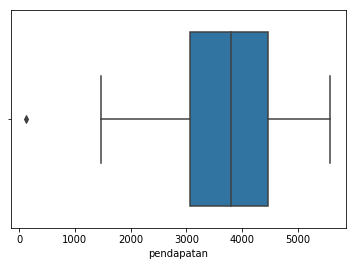

In [22]:
import seaborn as sns
# sns.boxplot(x=df['promosi'])
sns.boxplot(x=df['pendapatan'])

In [64]:
#menghilangkan outlier
from scipy import stats
z = np.abs(stats.zscore(df['pendapatan']))
print(len(z),z)

print(np.where(z > 1))
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


127 [1.39281481 2.14156637 1.73385781 1.95535208 1.69698766 1.8349371
 1.29509076 1.66759449 1.93376068 0.93393742 1.50238049 1.50575349
 1.46381622 0.6282207  1.73456122 1.52720081 0.11365789 1.65952359
 1.43303688 0.48147729 0.59939076 0.58810368 0.6378294  1.26979065
 0.36267455 0.37613241 0.82375971 0.33438051 0.2549383  0.97297607
 0.10545804 0.08749056 0.47865185 0.82251695 0.50883079 0.46962389
 0.07215466 0.08783084 3.45545801 0.42560284 0.12034182 0.93310195
 0.9256607  0.14221401 0.84256506 1.63796394 1.04092935 0.09655225
 0.25705132 0.81732091 0.28105281 0.10102455 0.17456426 0.83271376
 0.25897881 0.29893163 1.31121608 0.89631329 0.72539312 0.14827322
 0.79718009 0.87596123 0.5528075  1.00691895 0.72599981 1.2299445
 0.99485962 0.54418666 0.10141346 0.5583601  1.13836476 0.65392312
 0.53650086 0.5516162  1.19061465 0.38752578 0.89401278 0.37660547
 0.37609511 0.82299006 0.46474784 0.30007624 1.04799939 0.44828745
 0.64217067 0.03042407 1.11763887 1.59154379 0.73912893 0.12

126


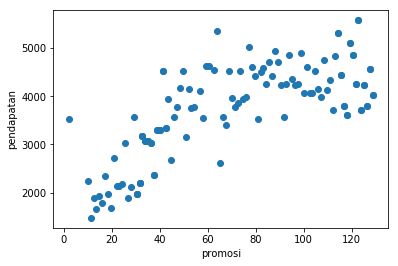

In [65]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(len(df_out))
plt.scatter(df_out['promosi'],df_out['pendapatan'])
plt.xlabel('promosi')
plt.ylabel('pendapatan')
plt.show()
#terdapat satu outlier yanf terhapus

function coef [  19.50727429 2327.70910759]


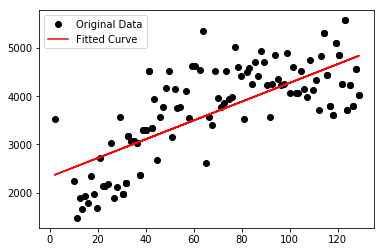

In [66]:
#linier
xdat = df_out['promosi']
ydat = df_out['pendapatan']
popt, pcov = curve_fit(linreg, xdat, ydat)
print("function coef",popt)
plt.figure()
plt.plot(xdat, ydat, 'ko', label="Original Data")
plt.plot(xdat, linreg(xdat, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()


function coef [-3.07225956e-01  6.35359915e+01  1.18020192e+03]


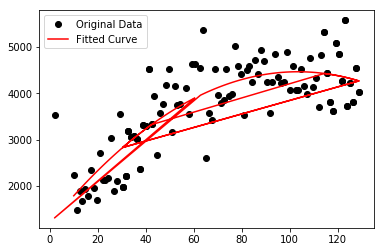

In [67]:
#kuardratik
xdat = df_out['promosi']
ydat = df_out['pendapatan']
popt, pcov = curve_fit(kuardratik, xdat, ydat)
print("function coef",popt)
plt.figure()
plt.plot(xdat, ydat, 'ko', label="Original Data")
plt.plot(xdat, kuardratik(xdat, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

function coef [-1.43678107e-03 -7.31263368e-03  4.59223830e+01  1.44478181e+03]


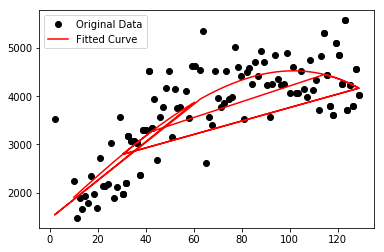

In [68]:
#kuardratik
popt, pcov = curve_fit(kubik, xdat, ydat)
print("function coef",popt)
plt.figure()
plt.plot(xdat, ydat, 'ko', label="Original Data")
plt.plot(xdat, kubik(xdat, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()